# 1. Data Preparation

1. Data Exploration:
    * Explore data
    * Explore the target variable (if we have one)
    
2. Find relationships between target and other variables
3. Data cleaning
    * Missing values
    * Outlier detection

# 2. Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# check number of variables and observations

print(df_train.shape)

(1460, 81)


In [4]:
# check column names and data types

df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
# check for duplicated id

idsUnique = len(set(df_train.Id))
idsTotal = len(df_train)
idsdupe = idsTotal - idsUnique
print(idsdupe)

# drop id col
df_train.drop(['Id'], axis = 1, inplace = True)

0


## Exploring the Target Variable

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

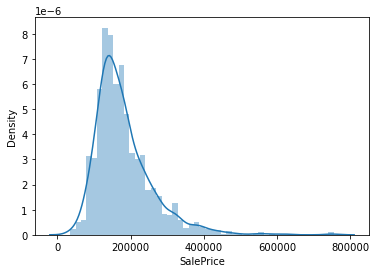

In [6]:
# descriptive statistics
df_train['SalePrice'].describe()

# histogram
sns.distplot(df_train['SalePrice'])

## Relationship Between the Target Variable and Predictors

In [7]:
sorted(list(df_train.columns))

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'Sa

## Numerical Variables

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

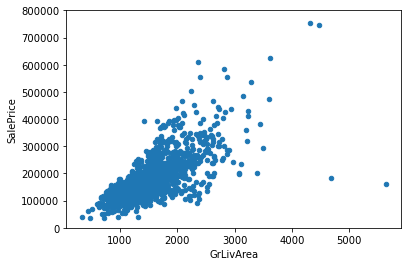

In [8]:
# scatter plot GrLivArea vs. SalePrice

var = 'GrLivArea'
data = df_train[['SalePrice', var]]
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000))

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

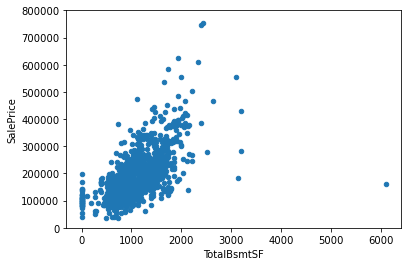

In [9]:
# scatter plot TotalBsmtSF vs. SalePrice

var = 'TotalBsmtSF'
data = df_train[['SalePrice', var]]
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000))

## Categorical Variables

(-0.5, 9.5, 0.0, 800000.0)

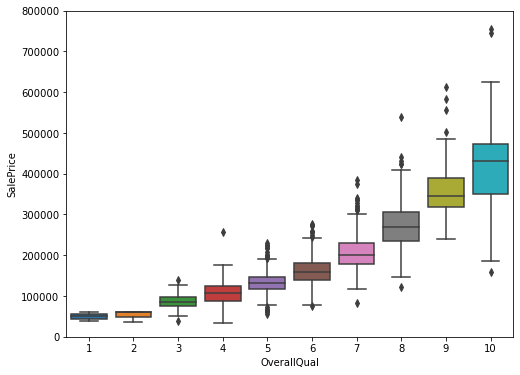

In [10]:
# overallqual

var = 'OverallQual'
data = df_train[['SalePrice', var]]
fig, ax = plt.subplots(figsize = (8, 6))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)

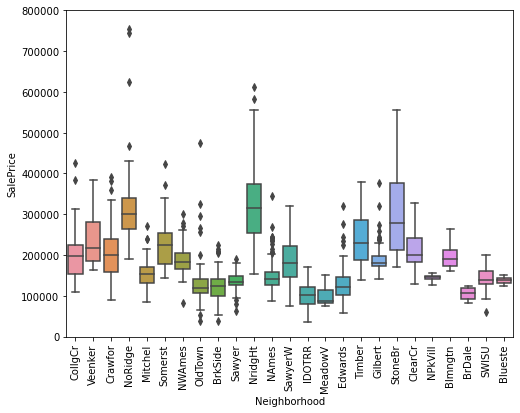

In [11]:
# Neighborhood

var = 'Neighborhood'
data = df_train[['SalePrice', var]]
fig, ax = plt.subplots(figsize = (8, 6))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)
plt.xticks(rotation = 90)
plt.show()

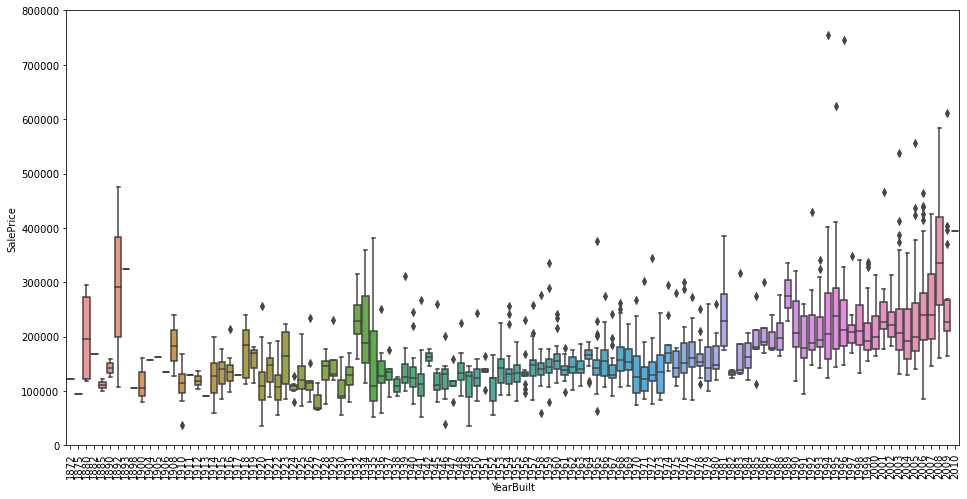

In [12]:
# YearBuilt

var = 'YearBuilt'
data = df_train[['SalePrice', var]]
fig, ax = plt.subplots(figsize = (16, 8))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)
plt.xticks(rotation = 90)
plt.show()

## Multivariate Analysis

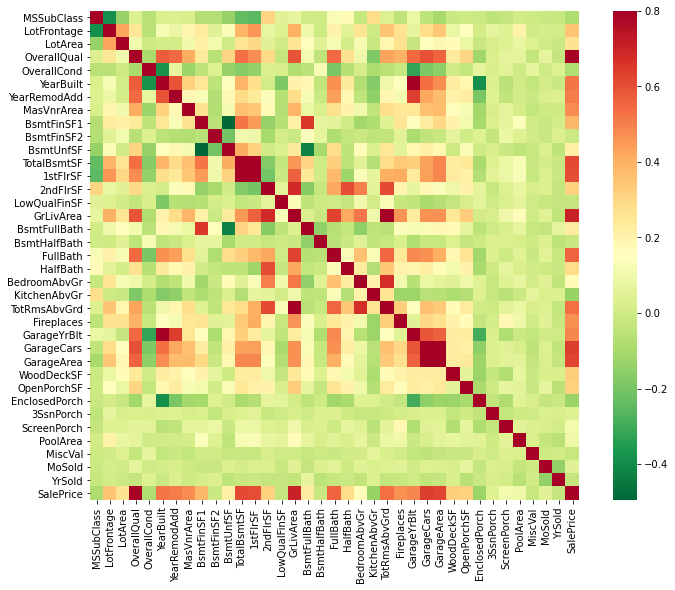

In [13]:
# correlation matrix

corrmat = df_train.corr()
fig, ax = plt.subplots(figsize = (12, 9))
fig = sns.heatmap(corrmat, vmax = .8, square = True, cmap = 'RdYlGn_r')

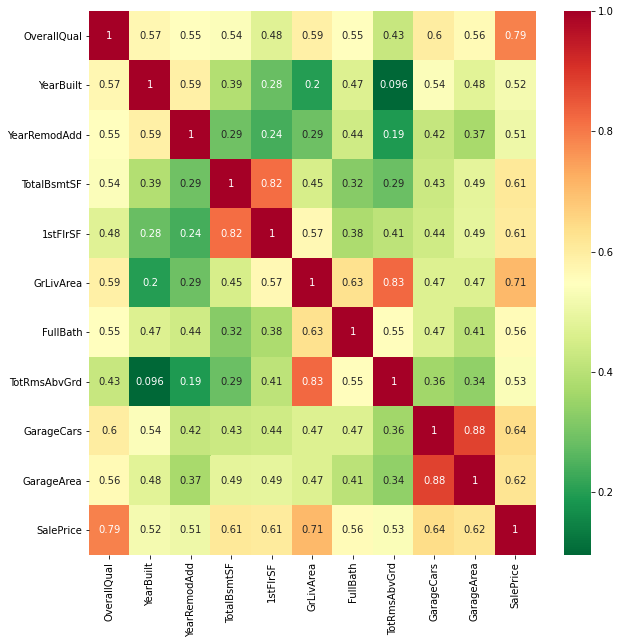

In [14]:
# most correlated features with SalePrice

corrmat = df_train.corr()
top_corr_features = corrmat.index[abs(corrmat['SalePrice']) > 0.5]
plt.figure(figsize = (10, 10))
g = sns.heatmap(df_train[top_corr_features].corr(), annot = True, cmap = 'RdYlGn_r')

# 3. Outlier Detection

Text(0.5, 0, 'TotalBsmtSF')

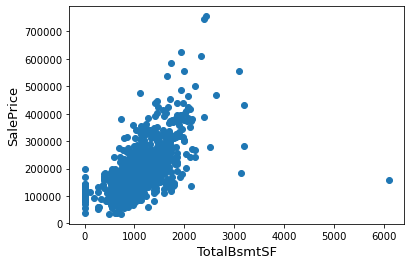

In [15]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['TotalBsmtSF'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize = 13)
plt.xlabel('TotalBsmtSF', fontsize = 13)

Text(0.5, 0, 'TotalBsmtSF')

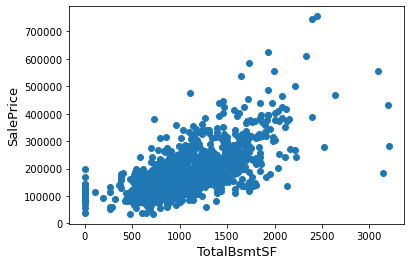

In [16]:
# delete outliers
df_train = df_train.drop(df_train[(df_train['TotalBsmtSF'] > 5000) & (df_train['SalePrice'] < 300000)].index)

# rest index
df_train = df_train.reset_index(drop = True)

# check the graph again
fig, ax = plt.subplots()
ax.scatter(x = df_train['TotalBsmtSF'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize = 13)
plt.xlabel('TotalBsmtSF', fontsize = 13)

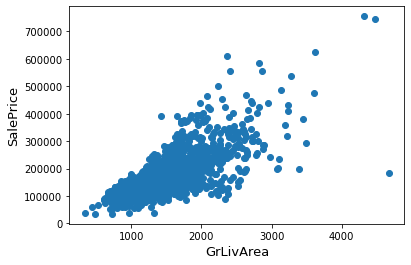

In [17]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize = 13)
plt.xlabel('GrLivArea', fontsize = 13)
plt.show()

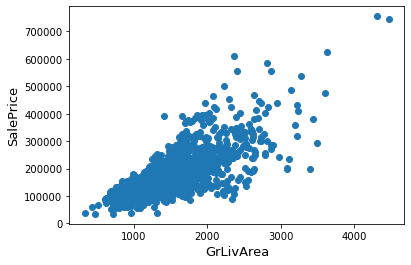

In [18]:
df_train = df_train.drop(df_train[(df_train['GrLivArea'] > 4000) & (df_train['SalePrice'] < 300000)].index)
df_train.reset_index(drop = True)

fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize = 13)
plt.xlabel('GrLivArea', fontsize = 13)
plt.show()

## 4. Null Value Replacement

In [19]:
# missing data
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys =['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageYrBlt,81,0.055556
GarageCond,81,0.055556
GarageType,81,0.055556
GarageFinish,81,0.055556


In [20]:
# drop 5 columns with the biggest ratio of null values
to_drop = missing_data.head(5).index.tolist()
df_train.drop(to_drop, axis = 1, inplace = True)

In [21]:
# extract the names of columns with missing values
cols_with_missing = missing_data[missing_data.Percent > 0].index.tolist()

# remove column names that are already removed from dataset
missing_cols = list(set(cols_with_missing) - set(to_drop))

# check the datatype
df_train.dtypes[missing_cols]

Electrical       object
GarageType       object
BsmtFinType1     object
LotFrontage     float64
GarageFinish     object
BsmtExposure     object
BsmtCond         object
BsmtFinType2     object
GarageYrBlt     float64
MasVnrType       object
MasVnrArea      float64
GarageQual       object
BsmtQual         object
GarageCond       object
dtype: object

## Numeric Variables

In [60]:
num_cols_with_missing = df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'float'].index.tolist()

# create new variable with the information that it was missing
for cl in num_cols_with_missing:
    df_train[cl + "_missing_ind"] = 0
    df_train.loc[df_train[cl].isnull(), cl + "_missing_ind"] = 1

In [23]:
df_train["LotFrontage"] = df_train["LotFrontage"].fillna(df_train["LotFrontage"].mean())
df_train["GarageYrBlt"] = df_train["GarageYrBlt"].fillna(df_train["GarageYrBlt"].min())
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)

## Object (String) Variables

In [53]:
# 2. for categorical variables:
df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'object']
cat_cols_with_missing = df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'object'].index.tolist()

Index(['Electrical', 'GarageType', 'GarageFinish', 'BsmtExposure',
       'MasVnrType'],
      dtype='object')

In [25]:
# GarageFinish : data description says NA means "no garage"
df_train["GarageFinish"] = df_train["GarageFinish"].fillna("None")

# GarageCond : data description says NA means "no garage"
df_train["GarageCond"] = df_train["GarageCond"].fillna("None")

# GarageQual : data description says NA means "no garage"
df_train["GarageQual"] = df_train["GarageQual"].fillna("None")

# GarageType : data description says NA means "no garage"
df_train["GarageType"] = df_train["GarageType"].fillna("None")

# BsmtExposure : data description says NA means "no basement"
df_train["BsmtExposure"] = df_train["BsmtExposure"].fillna("None")

# BsmtFinType2 : data description says NA means "no basement"
df_train["BsmtFinType2"] = df_train["BsmtFinType2"].fillna("None")

# BsmtFinType1 : data description says NA means "no basement"
df_train["BsmtFinType1"] = df_train["BsmtFinType1"].fillna("None")

# BsmtCond : data description says NA means "no basement"
df_train["BsmtCond"] = df_train["BsmtCond"].fillna("None")

# BsmtQual : data description says NA means "no basement"
df_train["BsmtQual"] = df_train["BsmtQual"].fillna("None")

In [26]:
df_train["Electrical"] = df_train["Electrical"].fillna("Empty")

df_train["MasVnrType"] = df_train["MasVnrType"].fillna("Empty")

In [61]:
# re-check again on missing data

total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys =['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
MSSubClass,0,0.0
GarageCond,0,0.0
GarageArea,0,0.0
GarageCars,0,0.0
GarageFinish,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0


## 5. Value Transformation

In [28]:
num_feats = df_train.dtypes[df_train.dtypes != 'object'].index.tolist()

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1stFlrSF', ylabel='Density'>

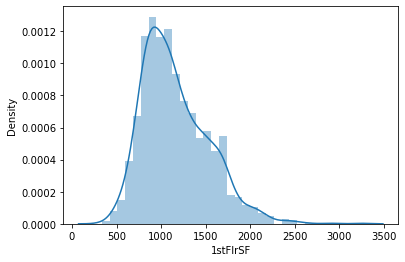

In [29]:
sns.distplot(df_train["1stFlrSF"])

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1stFlrSF_log', ylabel='Density'>

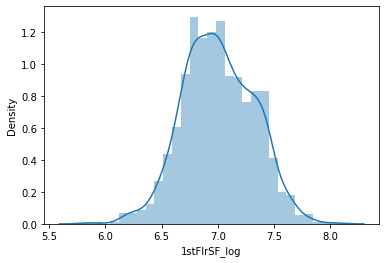

In [30]:
# log transformation
df_train["1stFlrSF_log"] = df_train["1stFlrSF"].apply(np.log)
sns.distplot(df_train["1stFlrSF_log"])

In [31]:
# Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train[num_feats+["1stFlrSF_log"]].astype(float)))

In [64]:
df_train_scaled.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontage_missing_ind,GarageYrBlt_missing_ind,MasVnrArea_missing_ind,1stFlrSF_log
0,0.073426,-0.228085,-0.203934,0.658506,-0.517649,1.052959,0.880362,0.523937,0.617283,-0.288867,...,-0.270407,-0.063709,-0.087748,-1.601578,0.138375,0.346896,-0.464772,-0.242536,-0.074278,-0.806414
1,-0.871868,0.485078,-0.087252,-0.068293,2.177825,0.158428,-0.428115,-0.570739,1.245719,-0.288867,...,-0.270407,-0.063709,-0.087748,-0.490155,-0.614427,0.007136,-0.464772,-0.242536,-0.074278,0.428328
2,0.073426,-0.085453,0.080162,0.658506,-0.517649,0.986698,0.831900,0.334044,0.108989,-0.288867,...,-0.270407,-0.063709,-0.087748,0.991743,0.138375,0.535652,-0.464772,-0.242536,-0.074278,-0.577066
3,0.309749,-0.465806,-0.092325,0.658506,-0.517649,-1.862551,-0.718888,-0.570739,-0.514826,-0.288867,...,-0.270407,-0.063709,-0.087748,-1.601578,-1.367230,-0.515088,-0.464772,-0.242536,-0.074278,-0.438379
4,0.073426,0.675255,0.385566,1.385305,-0.517649,0.953567,0.734975,1.384039,0.499451,-0.288867,...,-0.270407,-0.063709,-0.087748,2.103167,0.138375,0.869120,-0.464772,-0.242536,-0.074278,0.118856


In [33]:
df_train_scaled.columns = num_feats+["1stFlrSF_log"]
print(df_train_scaled.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'LotFrontage_missing_ind',
       'GarageYrBlt_missing_ind', 'MasVnrArea_missing_ind', '1stFlrSF_log'],
      dtype='object')


## String Variables

In [34]:
# lets map ORDINAL features
df_train = df_train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                           "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                           "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                             "ALQ" : 5, "GLQ" : 6},
                           "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                             "ALQ" : 5, "GLQ" : 6},
                           "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                           "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                           "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                           "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5,
                                           "Min2" : 6, "Min1" : 7, "Typ" : 8},
                           "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                           "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                           "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                           "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                           "Street" : {"Grvl" : 1, "Pave" : 2},
                           "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                         )

In [69]:
cat_feats = df_train.dtypes[df_train.dtypes == 'object'].index.tolist()
df_dummy = pd.get_dummies(df_train[cat_feats])
df_dummy

['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition']


,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,1,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1455,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


# Feature Creation

<AxesSubplot:xlabel='1stFlr_2ndFlr_SF', ylabel='SalePrice'>

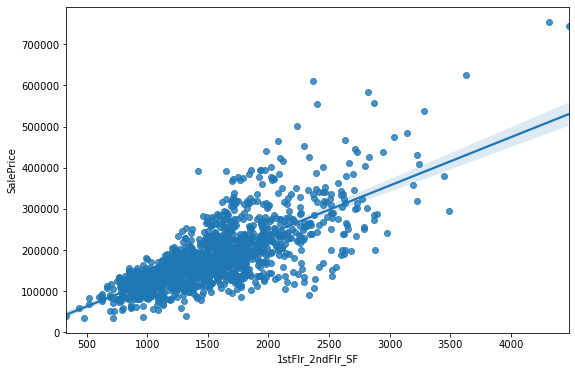

In [36]:
df_train['1stFlr_2ndFlr_SF'] = df_train['1stFlrSF'] + df_train['2ndFlrSF']


f, ax = plt.subplots(figsize=(9, 6))
# seaborn's regression plot
sns.regplot(x=(df_train['1stFlr_2ndFlr_SF']), y=df_train['SalePrice'], data=df_train, order=1)

<AxesSubplot:xlabel='OverallGrade', ylabel='SalePrice'>

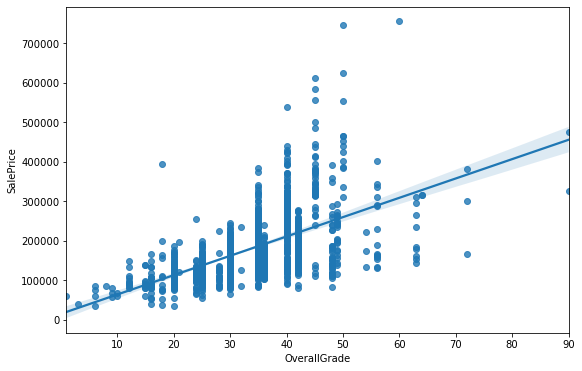

In [37]:
# overall quality of a house
df_train["OverallGrade"] = df_train["OverallQual"] * df_train["OverallCond"]

f, ax = plt.subplots(figsize=(9, 6))
# seaborn's regression plot
sns.regplot(x=(df_train['OverallGrade']), y=df_train['SalePrice'], data=df_train, order=1)

## Simplification of the Existing Features

(-0.5, 5.5, 0.0, 800000.0)

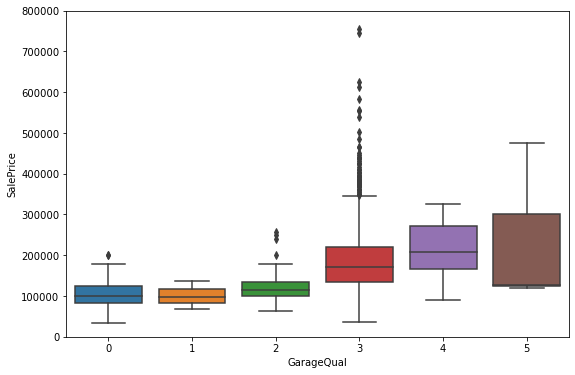

In [38]:
var = 'GarageQual'
f, ax = plt.subplots(figsize=(9, 6))
data = df_train[['SalePrice',var]]
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

In [39]:
df_train["SimplGarageQual"] = df_train.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })

(-0.5, 2.5, 0.0, 800000.0)

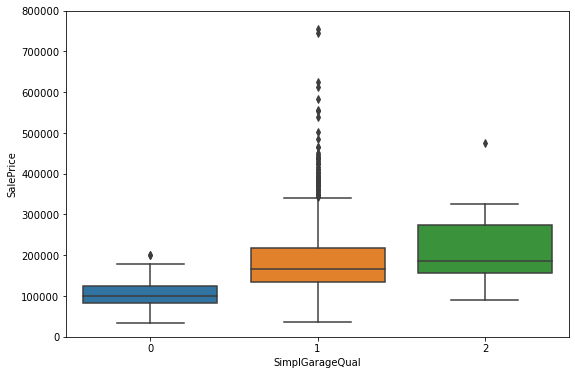

In [40]:
var = 'SimplGarageQual'
f, ax = plt.subplots(figsize=(9, 6))
data = df_train[['SalePrice',var]]
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

In [41]:
final_num_feats = df_train.dtypes[df_train.dtypes != 'object'].index.tolist()
df_numeric = df_train[final_num_feats]